# PanAntarctic MOM6 Simulations
This notebook documents some output from preliminary simulations using MOM6 with open boundaries to create a 1/20° Southern Ocean simulation.

In [1]:
%matplotlib inline
import cosima_cookbook as cc
from dask.distributed import Client
import matplotlib.pyplot as plt

## Update Database
Make a local database for this simulation and update.

In [2]:
db='panant.db'
session=cc.database.create_session(db)

In [3]:
dir_list = '/scratch/x77/ahg157/mom6/archive/panan'
cc.database.build_index(dir_list,session,update=True)

  7%|▋         | 4/54 [00:00<00:01, 31.69it/s]

Indexing experiment: panan


100%|██████████| 54/54 [00:03<00:00, 17.42it/s]


54

## Have a look at outputs
Use this explorer tool to see what outputs are available

In [3]:
dbx = cc.explore.DatabaseExplorer(session=session)
dbx

DatabaseExplorer(children=(HTML(value='<style>.header p{ line-height: 1.4; margin-bottom: 10px }</style>\n    …

## Basic sanity checks
These timeseries show the length of the run and some key quantities to confirm that Heat, Mass, Salt, Energy are sensible.

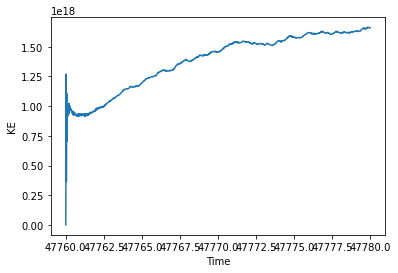

In [5]:
darray = cc.querying.getvar('panan','KE', session,ncfile='ocean.stats.nc',decode_times=False)
darray.coords['Time'] = darray.coords['Time']/365
darray.sum('Layer').plot()

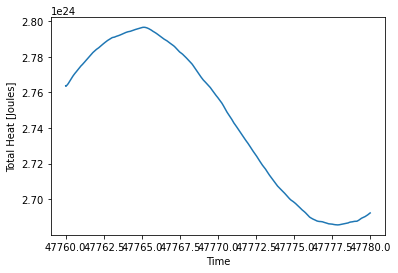

In [6]:
darray = cc.querying.getvar('panan','Heat', session,ncfile='ocean.stats.nc',decode_times=False)
darray.coords['Time'] = darray.coords['Time']/365
darray.plot()

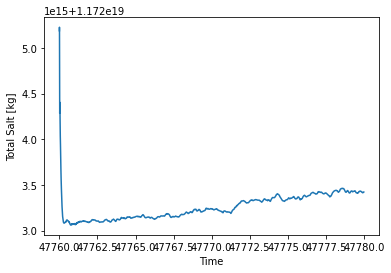

In [7]:
darray = cc.querying.getvar('panan','Salt', session,ncfile='ocean.stats.nc',decode_times=False)
darray.coords['Time'] = darray.coords['Time']/365
darray.plot()

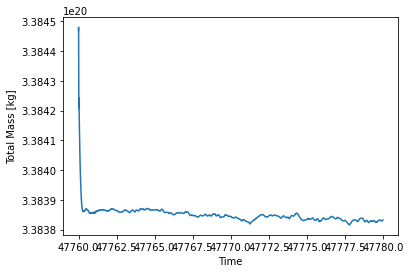

In [8]:
darray = cc.querying.getvar('panan','Mass', session,ncfile='ocean.stats.nc',decode_times=False)
darray.coords['Time'] = darray.coords['Time']/365
darray.plot()